# AULA 3 - Correlação e Exploração de Dados

## Aula

- Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


- Coletando a base a de dados da IMDB 500 para a análise

In [2]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv'
imdb = pd.read_csv(url)
imdb

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

- Conhecendo melhor o dataset

Visualizando as variaveis da coluna color

In [4]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [5]:
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [6]:
imdb['color'].value_counts(normalize = True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

É possivel observar que 95% dos filmes são coloridos.

Quais são os diretores que tem na nossa base de dados? E quantos filmes cada um tem?

In [7]:
imdb["director_name"].value_counts()

Steven Spielberg       26
Woody Allen            22
Martin Scorsese        20
Clint Eastwood         20
Ridley Scott           17
                       ..
Tyler Oliver            1
Dean Israelite          1
Katherine Dieckmann     1
Nicholaus Goossen       1
Patrick Gilmore         1
Name: director_name, Length: 2398, dtype: int64

Os diretores com mais filmes no dataset que coletamos são Steven Spielberg e Woody Allen.

Olhando o numero de criticas por filmes.

In [8]:
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [9]:
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

Plotando um histograma para visuzalizar o numero de review

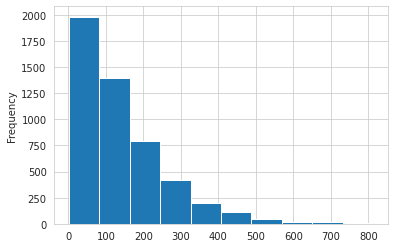

In [0]:
sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind='hist')

Verificamos que poucos filmes tem mais de 500 votos, por isso um paralelo que podemos fazer é que filmes com muitos votos são mais populares e filmes com poucos votos não são tão populares. Logo, pelo histograma fica evidente que poucos filmes fazem muito muito sucesso. Claro que não conseguimos afirmar isso com propriedade, pois, novamente, estamos lidando com um número restrito de dados, mas são pontos interessantes de se pensar.

Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja o aspecto financeiro. Vamos começar pelo gross:

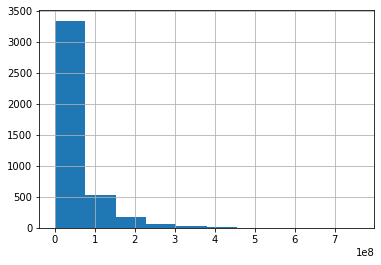

In [10]:
imdb["gross"].hist()

Como você deve ter reparado, essa é a primeira vez que as escalas estão totalmente diferentes, pois no eixo X temos valores tão altos que a escala teve que ser de centena de milhões. Veja como pouquíssimos filmes tem alto faturamento, o que nos acende um primeiro alerta de que tem algo estranho (ou temos filmes que rendem muito dinheiro neste dataset).

Vamos tentar conhecer quais são esses filmes com faturamento astronômico.

In [11]:
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


Nessa lista temos Avatar, Titanic, Jurassic World e The Avengers, o que parece fazer sentido para nós, pois sabemos que esses foram filmes com bilheterias gigantescas. Analisando esses dados conseguimos verificar que os maiores faturamentos fazem sentido, mas encontramos um problema nos dados, dado que encontramos duas linhas diplicadas. Podemos usar o pandas para remover esses dados, mas por enquanto vamos manter todas as informações.

Maravilha, agora temos o faturamento e parece estar OK. Queremos começar a responder algumas perguntas e uma delas é: será que filmes coloridos tem faturamento maior que filmes preto e branco?

Para começar a responder essa pergunta precisamos transformar a coluna Color:

In [12]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [13]:
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Veja que agora nós temos uma última coluna em nosso dataframe com valores 0 e 1. Agora podemos construir gráficos com essa informação de filmes coloridos ou não.

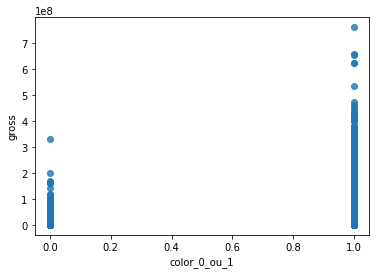

In [14]:
sns.regplot(data=color_or_bw, x="color_0_ou_1", y="gross", fit_reg=False)

Então plotamos nossos dados com um displot! Existem várias formas de visualizar essa informação, mas por ora essa nos ajuda a comparar os resultados. Repare como filmes coloridos tem valores bem maiores (isso já era até esperado), mas também temos pontos bem altos em filmes preto e branco, chamando muito atenção.

Vamos explorar algumas estatísticas destes filmes:

In [15]:
color_or_bw.groupby("color").mean()["gross"]

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [16]:
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [17]:
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

Das estatísticas temos duas bem interessantes, a média e mediana das notas de filmes preto e branco são maiores. Há várias possíveis explicações sobre o porquê disso, reflita aí sobre algumas delas e compartilhe conosco!

A partir de agora, vamos fazer uma investigação melhor em relação às finanças dos filmes (faturamento e orçamento). Vamos iniciar plotando e interpretando um gráfico de gross por budget:

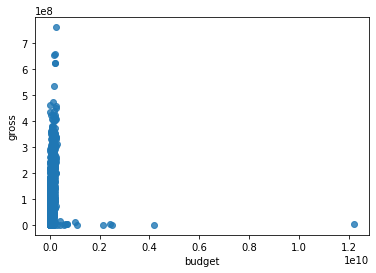

In [18]:
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.regplot(x="budget", y="gross", data = budget_gross, fit_reg=False)

Para plotar os dados, primeiro removemos as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0, para então gerar o gráfico.

Agora vamos analisar esse gráfico juntos, veja que a escala de budget mudou, agora é e10. Repare que apenas poucos filmes tem orçamentos tão grandes assim, e seus faturamentos são muito baixos. Será que temos algum problema nos dados? Vamos investigar melhor!

In [19]:
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


Ordenando os dados pelo budget percebemos que as primeiras posições são de filmes asiáticos. Um ponto interessante para a investigação, pois países como a Coreia usam moedas que tem três casas decimais a mais que o dólar. Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes.

Como não temos garantia dos números, vamos precisar trabalhar apenas com filmes americanos, assim garantimos que tanto gross e budget estão em dólares. Então vamos iniciar esse processo:

In [20]:
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

Veja que temos filmes de diversos locais de origem:

In [21]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Agora temos os dados para fazer uma análise melhor entre gross e budget. Vamos plotar o gráfico novamente:

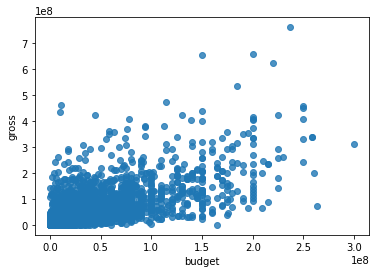

In [22]:
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")

sns.regplot(x="budget", y="gross", data = budget_gross, fit_reg = False)

Veja que interessante, aparentemente temos uma relação entre orçamento e faturamento. Quanto maior o orçamento, maior o faturamento.

Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, o lucro, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no dataset é conhecido como feature engineering.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


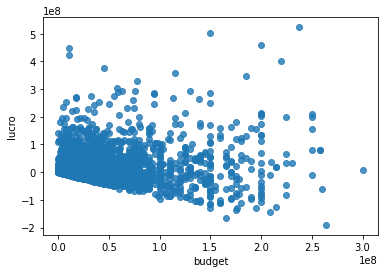

In [23]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()

sns.regplot(x="budget", y="lucro", data = budget_gross, fit_reg = False)

MUito bom! Nós construímos nossa coluna lucro na base de dados e plotamos o orçamento contra lucro.

Repare que temos pontos interessantes nesta visualização, um deles são esses filmes com muito custo e prejuizo. Isso pode ser um prejuizo real, mas também podem ser filmes que ainda não tiveram tempo de recuperar o investimento (lançamentos recentes). Outros pontos interessantes de se anlisar seriam os filmes com baixos orçamentos e muito lucro, será que são estão corretos ou pode ser algum erro da base? Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade?

Esse gráfico é muito rico em informações, vale a pena você gastar um tempo criando hipóteses.

Já que essa nova feature (lucro) parace ser interessante de se analisar, vamos continuar! Mas agora quero ver o lucro em relação ao ano de produção:

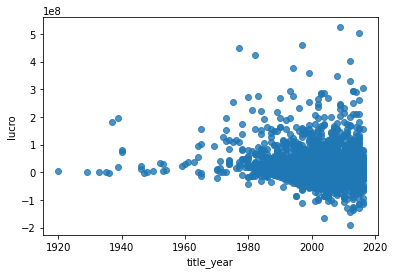

In [24]:
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()

sns.regplot(x="title_year", y="lucro", data = budget_gross, fit_reg = False)

Olha que legal esse gráfico, veja como alguns pontos mais recentes reforça a teoria de que alguns filmes podem ainda não ter recuperado o dinheiro investido (Claro que temos muitas variáveis para se analisar, mas é um indício relevante).

Outro ponto que chama muito atenção, são os filmes da década de 30 e 40 com lucros tão altos. Quais serão esses filmes? Bom, essa pergunta você vai responder no desafio do Paulo, que está louco para descobrir!

Uma sugestão de uma análise com os nome dos diretores e o orçamento de seus filmes, vamos ver se conseguimos concluir alguma coisa:

In [25]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


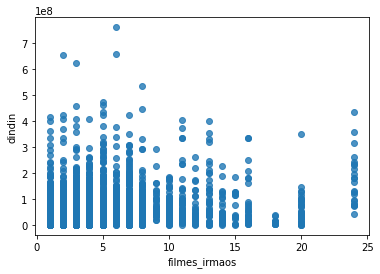

In [26]:
sns.regplot(x="filmes_irmaos", y="dindin", data = gross_director, fit_reg=False)

Essa imagem aparentemente não é muito conclusiva, então não conseguimos inferir tantas informações.

Esse processo de gerar dados, visualizações e acabar não sendo conclusivo é muito comum na vida de um cientista de dados, pode ir se acostumando =P.

Para finalizar, que tal realizar uma análise das correlações dos dados? EXistem várias formas de calcular a correlação, esse é um assunto denso.Você pode ler mais sobre essas métricas neste link.

Vamos então inciar a análise das correlações plotando o pairplot.

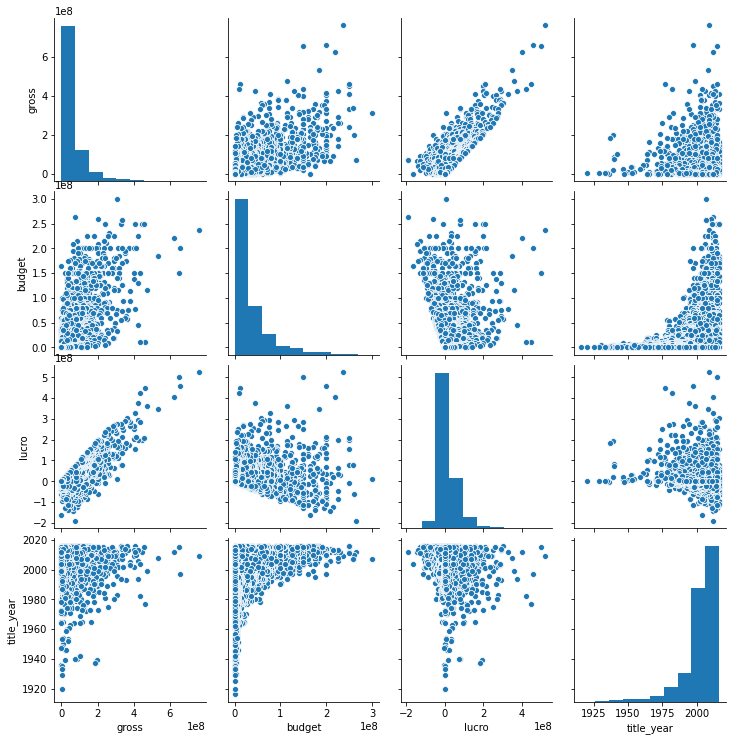

In [27]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]],kind ="scatter")

O pairplot mostra muita informação e a melhor forma de você entender é assistindo as conclusões que tiramos sobre esses gráficos na vídeoaula.

Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do .corr() do pandas.

In [0]:
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


Com o pandas é simples de se calcular a correlação, mas precisamos saber interpretar os resultados. Vamos fazer isso?

A correlação é uma métrica que vai de 1 a -1. Quando a correlação é 1, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10. Quando o valor da correlação é -1, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa), neste caso, se uma variável aumenta em 10 a outra reduz em 10. Agora quando a correlação é 0 temos a inexistência de correlação, ou seja, uma variável não tem influêcia sobre a outra.

Agora sim, entendido sobre a correlação vamos analisar as nossas. Veja que lucro e gross tem uma correlação alta, o que indica que quanto maior o orçamento maior o lucro (mas repare que a correlação não é perfeita), já o title_yers e lucro tem correlação negativa, mas muito perto de zero (ou seja quase não tem correlação). Viu como conseguimos analisar muitas coisas com a correlação?! Pense e tente analisar os outros casos também.

## Desafio 1 

- Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

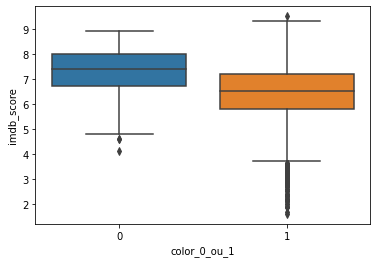

In [41]:
sns.boxplot(data = color_or_bw, x='color_0_ou_1',y='imdb_score')

## Desafio 2

- No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra qual é esse filme (budget próximo de 2.5).

In [43]:
imdb_usa.sort_values('lucro').head(1)['movie_title']

5    John Carter 
Name: movie_title, dtype: object

## Desafio 3

- Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [44]:
imdb_usa.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


In [49]:
imdb_usa.query("budget > 0 & gross > 0").sort_values("title_year",ascending = False)[["movie_title","title_year","lucro"]].head(10)

,movie_title,title_year,lucro
163,Gods of Egypt,2016.0,-108858926.0
2549,The Young Messiah,2016.0,-12037424.0
2404,My Big Fat Greek Wedding 2,2016.0,41573085.0
244,The Huntsman: Winter's War,2016.0,-67047980.0
1742,The Boss,2016.0,34034755.0
73,Suicide Squad,2016.0,-13912817.0
150,Ghostbusters,2016.0,-25900341.0
154,Kung Fu Panda 3,2016.0,-1476537.0
65,X-Men: Apocalypse,2016.0,-23014913.0
567,The Angry Birds Movie,2016.0,34225164.0


É possivel observar que os realmente os filmes mais recente desse dataset foram os que tiveram o maior prejuizo, mas isso nao implica que eles foram filmes ruins ou que realmente tiveram prejuizo. Um possivel consequencia desse resultado na analise, é que os nossos dados foram coletados no ano de lançamento desse filmes com maiores prejuizos. Sendo assim, não houve tempo para os filmes começar a arrecadar o lucro para cobrir os gastos na produção.


## Desafio 4

- Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

In [57]:
imdb_usa.query('lucro != 0 & title_year >= 1930 & title_year <=1940').sort_values("lucro",ascending = False)[["movie_title","lucro"]].head()

,movie_title,lucro
3970,Gone with the Wind,194678278.0
4449,Snow White and the Seven Dwarfs,182925485.0
1143,Pinocchio,81700000.0
4225,Fantasia,74120000.0
4157,The Wizard of Oz,19402612.0


## Desafio 5

- No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

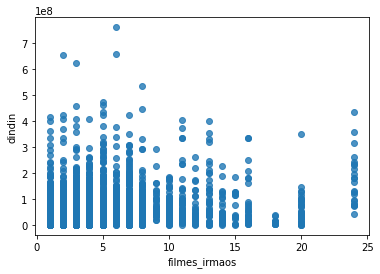

In [58]:
sns.regplot(x="filmes_irmaos", y="dindin", data = gross_director, fit_reg=False)

In [59]:
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


In [65]:
gross_director.drop_duplicates('director_name').query("filmes_irmaos == 18")[["director_name"]]

,director_name
1538,Woody Allen


A tese de que o cidadão "estranho" no grafico é o diretor Woody Allen está correta.

## Desafio 6

- Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

## Desafio 7

- Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [67]:
movie_2000 = imdb_usa.query("title_year >= 2000")
movie_2000.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


In [69]:
movie_2000['title_year'].min()

2000.0

In [72]:
movie_2000[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.105342
budget,0.709233,1.000000,0.097307,0.058550
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.105342,0.058550,0.035039,1.000000


## Desafio 8

- Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

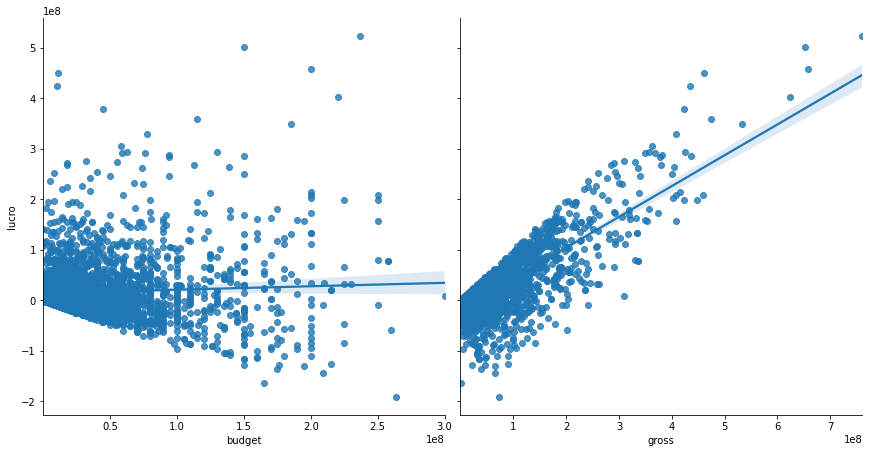

In [73]:
sns.pairplot(imdb_usa, y_vars='lucro', x_vars=['budget', 'gross'], height=6, kind='reg')

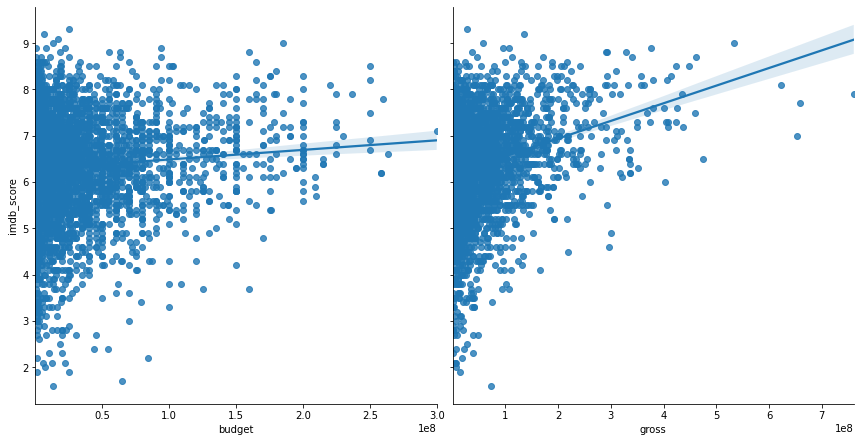

In [74]:
sns.pairplot(imdb_usa, y_vars='imdb_score', x_vars=['budget', 'gross'], height=6, kind='reg')

In [75]:
imdb_usa[["gross", "budget", "imdb_score"]].corr()

,gross,budget,imdb_score
gross,1.000000,0.645673,0.258948
budget,0.645673,1.000000,0.078936
imdb_score,0.258948,0.078936,1.000000


In [76]:
votos_por_ano = imdb_usa.groupby('title_year')['num_voted_users'].mean()
imdb_usa_votos_por_ano = imdb_usa.join(votos_por_ano, on='title_year', rsuffix='rs')
imdb_usa_votos_por_ano.rename(columns={'num_voted_usersrs': 'votos_por_ano'}, inplace=True)
imdb_usa_votos_por_ano.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro,votos_por_ano
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,90459.213115
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,105898.240000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,116836.911765
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,116836.911765
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0,105898.240000


In [77]:
imdb_usa_votos_por_ano[['title_year', 'votos_por_ano']].corr()

,title_year,votos_por_ano
title_year,1.000000,0.142897
votos_por_ano,0.142897,1.000000


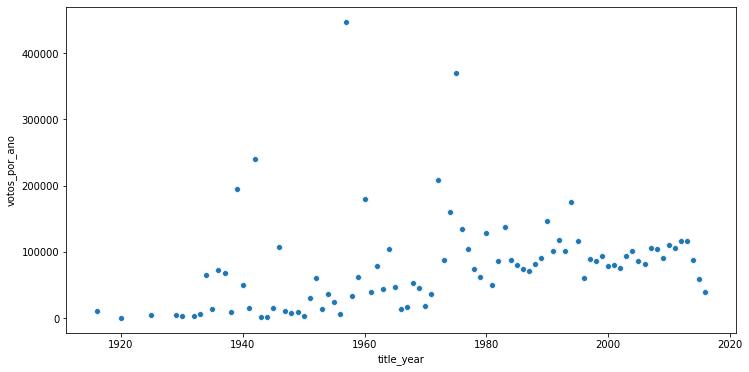

In [78]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='title_year', y='votos_por_ano', data=imdb_usa_votos_por_ano)

## Desafio 9

- Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.